In [2]:
#This code anipulates data files and reads label text files

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import shutil
import librosa
import soundfile as sf
import random

In [5]:
#Reads the data from set of labels
with open('data/vocalizationcorpus/labels.txt', 'r') as f:
    file_lines = f.readlines()

keymap =  pd.DataFrame([string.split(',') for string in file_lines])

In [6]:
#converts dataframe to numpy array
keymap_np = keymap.to_numpy()

In [40]:
np.argmax(keymap_np[10,:]=='laughter')

4

In [21]:
keymap_np[6,np.argmax(keymap_np[,:]=='laughter')+2]

'7.109'

In [41]:
keymap_np[10,:]

array(['S0010', 'F19-R', 'Female', '465.451', 'laughter', '6.705',
       '7.917\n', None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None], dtype=object)

In [30]:
#Declaration
labels = np.zeros((2763, 1))

# VISUALISING THE DATASET

In [73]:
t_start = []
t_end = []
for i in range(1,2763):
    if np.argmax(keymap_np[i,:]=='laughter') != 0:
        t_start.append(keymap_np[i,np.argmax(keymap_np[i,:]=='laughter')+1])
        t_end.append(keymap_np[i,np.argmax(keymap_np[i,:]=='laughter')+2])

        
t_start = np.array(np.char.strip(t_start,'\n')).astype(np.float)
t_end = np.array(np.char.strip(t_end,'\n')).astype(np.float)

In [74]:
mean = np.mean(t_end - t_start)#mean laughter time
print('Mean = ', mean)

std = np.std(t_end - t_start)#std
print('Standard Deviation = ', std)

Mean =  0.9339978609625669
Standard Deviation =  0.6981486549299163


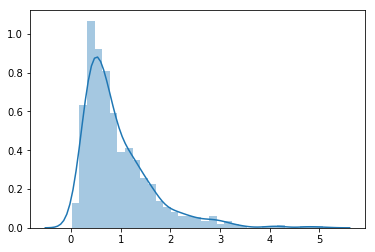

In [75]:
sns.distplot(t_end - t_start); # plots the distribution of laughter times

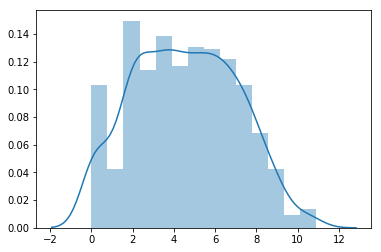

In [77]:
sns.distplot(t_start)#Shows laughter segment is usually between 2-8 seconds

# SEGMENTING LAUGHTERS 

In [68]:
#SEGMENT LAUGHTER into windows of size 0.5 seconds. The windows overlap with each other to approximately 0.25 ms.

In [108]:
t_segment = 0.5
t_overlap = t_segment/2

In [109]:
#We re-use the above code

In [116]:
# t_start = []
counter = 0
for i in range(1,2763):
    if np.argmax(keymap_np[i,:]=='laughter') != 0:
        t_begin = np.array(np.char.strip(keymap_np[i,np.argmax(keymap_np[i,:]=='laughter')+1],'\n')).astype(np.float)
        t_finish = np.array(np.char.strip(keymap_np[i,np.argmax(keymap_np[i,:]=='laughter')+2],'\n')).astype(np.float)
        
        #Find number of segments
        if t_finish - t_begin >= 0.5:
            print('i =', i, 'Segmenting...')
            audio_path = 'data/vocalizationcorpus/data/S' + f'{i:04}' + '.wav'
            x , sr = librosa.load(audio_path, sr=None)
            n_segments = (((t_finish - t_begin)//t_overlap) - 1)#gives number of segments
            for i in range(int(n_segments)):
                counter = counter + 1
                t1 = t_begin + i*t_overlap
                t2 = t1 + t_segment
                sf.write('data/Segmented_Laugh/' + f'{counter}' + '.wav', x[int(t1*sr):int(t2*sr)], sr)

i = 2 Segmenting...
i = 3 Segmenting...
i = 5 Segmenting...
i = 6 Segmenting...
i = 9 Segmenting...
i = 10 Segmenting...
i = 11 Segmenting...
i = 12 Segmenting...
i = 13 Segmenting...
i = 15 Segmenting...
i = 17 Segmenting...
i = 20 Segmenting...
i = 21 Segmenting...
i = 23 Segmenting...
i = 24 Segmenting...
i = 26 Segmenting...
i = 27 Segmenting...
i = 31 Segmenting...
i = 33 Segmenting...
i = 38 Segmenting...
i = 46 Segmenting...
i = 50 Segmenting...
i = 52 Segmenting...
i = 66 Segmenting...
i = 67 Segmenting...
i = 71 Segmenting...
i = 87 Segmenting...
i = 90 Segmenting...
i = 91 Segmenting...
i = 98 Segmenting...
i = 99 Segmenting...
i = 102 Segmenting...
i = 103 Segmenting...
i = 104 Segmenting...
i = 105 Segmenting...
i = 108 Segmenting...
i = 115 Segmenting...
i = 119 Segmenting...
i = 122 Segmenting...
i = 124 Segmenting...
i = 125 Segmenting...
i = 126 Segmenting...
i = 127 Segmenting...
i = 130 Segmenting...
i = 135 Segmenting...
i = 136 Segmenting...
i = 137 Segmenting...
i 

i = 1699 Segmenting...
i = 1700 Segmenting...
i = 1712 Segmenting...
i = 1713 Segmenting...
i = 1717 Segmenting...
i = 1720 Segmenting...
i = 1722 Segmenting...
i = 1723 Segmenting...
i = 1726 Segmenting...
i = 1727 Segmenting...
i = 1728 Segmenting...
i = 1729 Segmenting...
i = 1731 Segmenting...
i = 1732 Segmenting...
i = 1733 Segmenting...
i = 1734 Segmenting...
i = 1736 Segmenting...
i = 1740 Segmenting...
i = 1754 Segmenting...
i = 1768 Segmenting...
i = 1769 Segmenting...
i = 1782 Segmenting...
i = 1786 Segmenting...
i = 1795 Segmenting...
i = 1807 Segmenting...
i = 1815 Segmenting...
i = 1825 Segmenting...
i = 1830 Segmenting...
i = 1833 Segmenting...
i = 1837 Segmenting...
i = 1839 Segmenting...
i = 1857 Segmenting...
i = 1865 Segmenting...
i = 1866 Segmenting...
i = 1868 Segmenting...
i = 1870 Segmenting...
i = 1875 Segmenting...
i = 1886 Segmenting...
i = 1888 Segmenting...
i = 1890 Segmenting...
i = 1894 Segmenting...
i = 1895 Segmenting...
i = 1896 Segmenting...
i = 1898 Se

In [104]:
random.randint(1,10)

10

# SEGMENTING NON-LAUGHTER AUDIOS

In [105]:
t_segment = 0.5

In [114]:
counter = 0
while (counter < 2151):
    counter = counter + 1
    
    file = random.randint(1,1815)
    t1 = random.randint(1,10)
    t2 = t1 + t_segment
    
    print('Segmenting counter = ', counter, 'File = ', file )
    
    audio_path = 'data/NonLaugh/' + f'{file}' + '.wav'
    x , sr = librosa.load(audio_path, sr=None)
    sf.write('data/Segmented_NonLaugh4/' + f'{counter}' + '.wav', x[int(t1*sr):int(t2*sr)], sr)

Segmenting counter =  1 File =  129
Segmenting counter =  2 File =  1684
Segmenting counter =  3 File =  1390
Segmenting counter =  4 File =  1694
Segmenting counter =  5 File =  381
Segmenting counter =  6 File =  1303
Segmenting counter =  7 File =  1402
Segmenting counter =  8 File =  1388
Segmenting counter =  9 File =  1187
Segmenting counter =  10 File =  1507
Segmenting counter =  11 File =  321
Segmenting counter =  12 File =  800
Segmenting counter =  13 File =  453
Segmenting counter =  14 File =  1584
Segmenting counter =  15 File =  429
Segmenting counter =  16 File =  1195
Segmenting counter =  17 File =  996
Segmenting counter =  18 File =  412
Segmenting counter =  19 File =  1277
Segmenting counter =  20 File =  326
Segmenting counter =  21 File =  418
Segmenting counter =  22 File =  856
Segmenting counter =  23 File =  348
Segmenting counter =  24 File =  1560
Segmenting counter =  25 File =  1272
Segmenting counter =  26 File =  1258
Segmenting counter =  27 File =  

Segmenting counter =  221 File =  1431
Segmenting counter =  222 File =  84
Segmenting counter =  223 File =  302
Segmenting counter =  224 File =  709
Segmenting counter =  225 File =  166
Segmenting counter =  226 File =  1110
Segmenting counter =  227 File =  560
Segmenting counter =  228 File =  1290
Segmenting counter =  229 File =  348
Segmenting counter =  230 File =  414
Segmenting counter =  231 File =  164
Segmenting counter =  232 File =  316
Segmenting counter =  233 File =  1067
Segmenting counter =  234 File =  633
Segmenting counter =  235 File =  43
Segmenting counter =  236 File =  1247
Segmenting counter =  237 File =  1701
Segmenting counter =  238 File =  29
Segmenting counter =  239 File =  1279
Segmenting counter =  240 File =  1426
Segmenting counter =  241 File =  723
Segmenting counter =  242 File =  31
Segmenting counter =  243 File =  1285
Segmenting counter =  244 File =  79
Segmenting counter =  245 File =  1193
Segmenting counter =  246 File =  1284
Segmen

Segmenting counter =  493 File =  186
Segmenting counter =  494 File =  76
Segmenting counter =  495 File =  1622
Segmenting counter =  496 File =  1516
Segmenting counter =  497 File =  488
Segmenting counter =  498 File =  1782
Segmenting counter =  499 File =  1527
Segmenting counter =  500 File =  1503
Segmenting counter =  501 File =  546
Segmenting counter =  502 File =  178
Segmenting counter =  503 File =  283
Segmenting counter =  504 File =  1104
Segmenting counter =  505 File =  1343
Segmenting counter =  506 File =  428
Segmenting counter =  507 File =  1266
Segmenting counter =  508 File =  1481
Segmenting counter =  509 File =  241
Segmenting counter =  510 File =  103
Segmenting counter =  511 File =  1250
Segmenting counter =  512 File =  716
Segmenting counter =  513 File =  162
Segmenting counter =  514 File =  894
Segmenting counter =  515 File =  880
Segmenting counter =  516 File =  1278
Segmenting counter =  517 File =  1320
Segmenting counter =  518 File =  595
S

Segmenting counter =  717 File =  309
Segmenting counter =  718 File =  990
Segmenting counter =  719 File =  1438
Segmenting counter =  720 File =  1296
Segmenting counter =  721 File =  743
Segmenting counter =  722 File =  974
Segmenting counter =  723 File =  210
Segmenting counter =  724 File =  1348
Segmenting counter =  725 File =  1696
Segmenting counter =  726 File =  453
Segmenting counter =  727 File =  36
Segmenting counter =  728 File =  633
Segmenting counter =  729 File =  216
Segmenting counter =  730 File =  391
Segmenting counter =  731 File =  1583
Segmenting counter =  732 File =  376
Segmenting counter =  733 File =  1019
Segmenting counter =  734 File =  34
Segmenting counter =  735 File =  1737
Segmenting counter =  736 File =  1347
Segmenting counter =  737 File =  92
Segmenting counter =  738 File =  1725
Segmenting counter =  739 File =  962
Segmenting counter =  740 File =  1021
Segmenting counter =  741 File =  138
Segmenting counter =  742 File =  1354
Segm

Segmenting counter =  973 File =  838
Segmenting counter =  974 File =  1158
Segmenting counter =  975 File =  471
Segmenting counter =  976 File =  1191
Segmenting counter =  977 File =  23
Segmenting counter =  978 File =  318
Segmenting counter =  979 File =  1498
Segmenting counter =  980 File =  1095
Segmenting counter =  981 File =  1663
Segmenting counter =  982 File =  22
Segmenting counter =  983 File =  223
Segmenting counter =  984 File =  1321
Segmenting counter =  985 File =  977
Segmenting counter =  986 File =  392
Segmenting counter =  987 File =  1053
Segmenting counter =  988 File =  822
Segmenting counter =  989 File =  774
Segmenting counter =  990 File =  280
Segmenting counter =  991 File =  82
Segmenting counter =  992 File =  896
Segmenting counter =  993 File =  1621
Segmenting counter =  994 File =  461
Segmenting counter =  995 File =  689
Segmenting counter =  996 File =  124
Segmenting counter =  997 File =  417
Segmenting counter =  998 File =  1811
Segmen

Segmenting counter =  1191 File =  4
Segmenting counter =  1192 File =  759
Segmenting counter =  1193 File =  1000
Segmenting counter =  1194 File =  1479
Segmenting counter =  1195 File =  808
Segmenting counter =  1196 File =  1213
Segmenting counter =  1197 File =  1260
Segmenting counter =  1198 File =  956
Segmenting counter =  1199 File =  1452
Segmenting counter =  1200 File =  1195
Segmenting counter =  1201 File =  1170
Segmenting counter =  1202 File =  1075
Segmenting counter =  1203 File =  1165
Segmenting counter =  1204 File =  1761
Segmenting counter =  1205 File =  1266
Segmenting counter =  1206 File =  1474
Segmenting counter =  1207 File =  1271
Segmenting counter =  1208 File =  1460
Segmenting counter =  1209 File =  1689
Segmenting counter =  1210 File =  1272
Segmenting counter =  1211 File =  659
Segmenting counter =  1212 File =  711
Segmenting counter =  1213 File =  925
Segmenting counter =  1214 File =  1656
Segmenting counter =  1215 File =  1242
Segmentin

Segmenting counter =  1411 File =  42
Segmenting counter =  1412 File =  1764
Segmenting counter =  1413 File =  83
Segmenting counter =  1414 File =  1563
Segmenting counter =  1415 File =  868
Segmenting counter =  1416 File =  387
Segmenting counter =  1417 File =  786
Segmenting counter =  1418 File =  1774
Segmenting counter =  1419 File =  1375
Segmenting counter =  1420 File =  292
Segmenting counter =  1421 File =  76
Segmenting counter =  1422 File =  400
Segmenting counter =  1423 File =  375
Segmenting counter =  1424 File =  214
Segmenting counter =  1425 File =  1502
Segmenting counter =  1426 File =  610
Segmenting counter =  1427 File =  111
Segmenting counter =  1428 File =  943
Segmenting counter =  1429 File =  1613
Segmenting counter =  1430 File =  1191
Segmenting counter =  1431 File =  1195
Segmenting counter =  1432 File =  988
Segmenting counter =  1433 File =  1289
Segmenting counter =  1434 File =  1195
Segmenting counter =  1435 File =  611
Segmenting counter

Segmenting counter =  1668 File =  636
Segmenting counter =  1669 File =  417
Segmenting counter =  1670 File =  1233
Segmenting counter =  1671 File =  316
Segmenting counter =  1672 File =  1473
Segmenting counter =  1673 File =  121
Segmenting counter =  1674 File =  263
Segmenting counter =  1675 File =  1165
Segmenting counter =  1676 File =  99
Segmenting counter =  1677 File =  1600
Segmenting counter =  1678 File =  1549
Segmenting counter =  1679 File =  1037
Segmenting counter =  1680 File =  1082
Segmenting counter =  1681 File =  450
Segmenting counter =  1682 File =  1181
Segmenting counter =  1683 File =  222
Segmenting counter =  1684 File =  10
Segmenting counter =  1685 File =  1421
Segmenting counter =  1686 File =  786
Segmenting counter =  1687 File =  834
Segmenting counter =  1688 File =  927
Segmenting counter =  1689 File =  747
Segmenting counter =  1690 File =  900
Segmenting counter =  1691 File =  716
Segmenting counter =  1692 File =  1311
Segmenting counte

Segmenting counter =  1901 File =  1477
Segmenting counter =  1902 File =  1311
Segmenting counter =  1903 File =  617
Segmenting counter =  1904 File =  875
Segmenting counter =  1905 File =  1190
Segmenting counter =  1906 File =  1447
Segmenting counter =  1907 File =  1174
Segmenting counter =  1908 File =  572
Segmenting counter =  1909 File =  1312
Segmenting counter =  1910 File =  1044
Segmenting counter =  1911 File =  1060
Segmenting counter =  1912 File =  557
Segmenting counter =  1913 File =  290
Segmenting counter =  1914 File =  150
Segmenting counter =  1915 File =  639
Segmenting counter =  1916 File =  578
Segmenting counter =  1917 File =  904
Segmenting counter =  1918 File =  347
Segmenting counter =  1919 File =  1471
Segmenting counter =  1920 File =  533
Segmenting counter =  1921 File =  514
Segmenting counter =  1922 File =  955
Segmenting counter =  1923 File =  1709
Segmenting counter =  1924 File =  253
Segmenting counter =  1925 File =  1102
Segmenting cou

Segmenting counter =  2120 File =  225
Segmenting counter =  2121 File =  846
Segmenting counter =  2122 File =  490
Segmenting counter =  2123 File =  688
Segmenting counter =  2124 File =  1332
Segmenting counter =  2125 File =  849
Segmenting counter =  2126 File =  1218
Segmenting counter =  2127 File =  1146
Segmenting counter =  2128 File =  1011
Segmenting counter =  2129 File =  866
Segmenting counter =  2130 File =  1052
Segmenting counter =  2131 File =  1701
Segmenting counter =  2132 File =  1676
Segmenting counter =  2133 File =  702
Segmenting counter =  2134 File =  717
Segmenting counter =  2135 File =  1278
Segmenting counter =  2136 File =  610
Segmenting counter =  2137 File =  845
Segmenting counter =  2138 File =  728
Segmenting counter =  2139 File =  1028
Segmenting counter =  2140 File =  513
Segmenting counter =  2141 File =  1692
Segmenting counter =  2142 File =  558
Segmenting counter =  2143 File =  37
Segmenting counter =  2144 File =  586
Segmenting count